# Práctica Final por Equipos

### Equipo 5
- Ita Santiago
- Mario Hernandez
- José Reyes 



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from data_cleaning import *
from funciones import label
from sklearn.linear_model import LinearRegression

### Introducción

El objetivo de esta trabajo es presentar los resultados análisis de ventas de videojuegos así como una descripción de todo el proceso. Se describirá a detalle, la base de datos utilizada así como un análisis exploratorio inicial para facilitar la limpieza y tratamiento de los datos. Después, se presentará el proceso de análisis exploratorio de los datos, asi como los principales hallazgos. En este análisis exploratorio buscamos entender las ventas de videojuegos, identificar a los principales jugadores en el mercado y las tendencias de los consumidores. Por último, buscamos indentificar si existe una relación entre las ventas, calificación de usuarios y calificación de críticos. Para esto, se propone una serie de modelos lineales. También se incluirá una descripción de los paquetes y funciones utilizadas para este trabajo.

### Base de datos y análisis exploratorio inicial

Para este análisis, utilizamos una [base de datos](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings?select=Video_Games_Sales_as_at_22_Dec_2016.csv) de ventas de videojuegos a diciembre de 2016. Esta base de datos se obtuvo de Kaggle del usuario [Rush Kirubi](https://www.kaggle.com/rush4ratio). La base de datos se descargó de forma local en formato csv convirtió a dataframe para su análisis.


La base de datos contiene el nombre del videojuego, año de lanzamiento, plataforma, género, rating y creador. Además contiene sus ventas por region, y calificación de críticos y usuarios. Cada renglon de la base de datos representa una observación. Las columnas del dataframe son:

In [7]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


En esta primera fase, fue necesario explorar los datos para asegurar que pudiera realizarse un analisis estadístico correctamente. Esta fase incluyo revisar lo siguiente:
- Variables  del tipo correcto
- Valores faltantes (nan/None)
- Presencia de datos atípicos
- Revisar las categorías de las variables categóricas. 

El resultado de la revisión de tipo de variables fue el siguiente:

In [8]:
df_raw.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

Notamos una inconsistencia en la variable User_Score, se registó como object en cuando debería ser float64. Observamos los valores que toma esta variabe y notamos que existe una observación "tbd", por lo que debe ser sustituida por nan para que pueda ser procesada correctamente como variable float.

In [9]:
df_raw.User_Score.unique()

array([80., nan, 83., 85., 66., 84., 86., 77., 63., 74., 82., 90., 79.,
       81., 87., 71., 34., 53., 48., 32., 89., 64., 78., 75., 26., 72.,
       92., 70., 73., 43., 76., 57., 50., 91., 65., 88., 69., 94., 68.,
       61., 67., 54., 40., 49., 45., 93., 62., 42., 60., 37., 41., 58.,
       56., 55., 44., 46., 59., 39., 31., 29., 52., 33., 47., 51., 35.,
       25., 19., 30., 27., 22., 20., 95., 21., 36., 28., 18., 38.,  0.,
       16., 96., 24., 17., 11.,  3., 15.,  7., 12., 23.,  5., 13.,  2.,
        6., 14.,  9., 10., 97.])

Después se revisó la presencia de valores faltantes. Se encontró que 2 observaciones no tenían nombre y que 269 no tenían año de publicación. Se decidió que estas dos variables eran fundamentales, por lo que se debían eliminar las observaciones que no contaran con estos datos. 

In [10]:
print("Antes")
print(df_raw.isna().sum())

Antes
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
Critic_Count       8465
User_Score         8985
User_Count         8985
Developer          6541
Rating             6679
dtype: int64


In [11]:
print("Después")
print(df.isna().sum())

Después
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8465
Critic_Count       8465
User_Score         8985
User_Count         8985
Developer          6541
Rating             6679
dtype: int64


También fue necesario revisar que las variables númericas se encontraran dentro de los rangos permitidos. Las variables númericas son:
           
          'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count'
       
Para buscar datos atípicos en 'Critic_Score' y 'User_Score' se utilizó una gráfica box-plot. Primero identificamos el rango de las variables, en el caso de 'Critic_Score' era de 0 a 100 mientras que en 'User_Score' fue de 0-10. Se decidió homologar ambas esclalas al transformar 'User-Score' multiplicandola por 10. De esta forma ambos box-plots tendrían el mismo rango de valores. 

[Text(0, 0, 'User Score')]

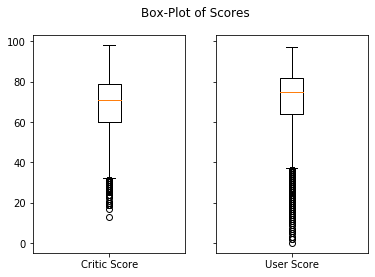

In [7]:
fig1,axs=plt.subplots(1,2,sharey=True)
fig1.suptitle("Box-Plot of Scores")
axs[0].boxplot(df.Critic_Score[~np.isnan(df.Critic_Score)])
axs[0].set_xticklabels(["Critic Score"])
axs[1].boxplot(df.User_Score[~np.isnan(df.User_Score)])
axs[1].set_xticklabels(["User Score"])


Las gráficas muestran no hay valores fuera del rango permitido. Notamos que muchos datos se encuentran dispersos en el primer cuartil, sin embargo no podriamos considerarlos valores atípicos por errores de medición/captura ya que están dentro del rango de calificación permitido. Para el resto de las variables, se utilizó el método describe de Pandas.

In [8]:
df_summary

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,7463.000000
mean,2006.488996,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,163.015141
std,5.877470,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.53000,98.000000,113.000000,10665.000000


La tabla anterior nos da información similar a la de un box-plot. Para las variables de ventas y count, los valores mínimos y máximos se encuentran dentro de valores realistas. Además, destaca una gran diferencia entre el valor del tercer cuartil y el valor máximo. Esta diferencia puede ser atribuida a que existen algunos juegos muy populares que generan muchas ventas y atraen a más usuarios y críticos. A pesar de tener valores atípicos, es muy poco probable que sean atribuidos a errores de medición o de captura. 

Por último, se revisaron los factores de las variables categoricas, buscando que los valores no estuvieran duplicados o con algún error. En este caso no fue necesaria ninguna modificación.

In [9]:
for i in cat_data_counts.values():
    print(i.head(n=5))

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
Name: Platform, dtype: int64
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: Year_of_Release, dtype: int64
Action          3308
Sports          2306
Misc            1721
Role-Playing    1483
Shooter         1296
Name: Genre, dtype: int64
Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          930
Konami Digital Entertainment     825
Name: Publisher, dtype: int64
E       3922
T       2905
M       1536
E10+    1393
EC         8
Name: Rating, dtype: int64


Tras revisar todas estas carácteristicas, la base de datos podría ser utilizada para un analisis estadístico mas profundo.

#### Paquetes Utilizados

Para esta sección, se utilizaron principalmente dos paquetes, [Pandas](https://pandas.pydata.org/docs/) y [Matplotlib](https://matplotlib.org/3.2.1/contents.html). Pandas es un paquete que permite trabajar con estructuras de datos multidimensionales que pueden ser de forma tabular, ordenada o no ordenada, que incluyan observaciones y variables en renglones y columnas. Este paquete permite trabajar con bases de datos y relacionarlas entre sí, por medio de índices. La estructura de datos utilizada para trabajar en nuestro proyecto fue el Dataframe, que es una estructura en dos dimensiones donde cada fila representa una observación y cada columna una variable. Pandas permite manipular estos objetos de forma amigable por lo que se vuelve una herramienta muy útil para la ciencia de datos. En esta sección, se utilizaron múltiples funciones y métodos asociados a los objetos de pandas. Iniciando con la importación de los datos de un formato csv con la función <pd.read_csv()> que permitió leer la base de datos original y almacenarla en un objeto DataFrame. Después con los métodos <.isnan()> y <.sum()>; su uso en conjunto permitió identificar el número de valores faltantes en la base de datos y poder tomar una decisión sobre qué hacer con esas observaciones. Fácilmente se eliminaron con el méthodo <.dropna()> aplicado únicamente sobre columnas específicas. Los otros métodos que permitieron verificar que la base de base de datos estuviera correcta fueron <.unique()> y <.value_counts()>. Ambas permiten eliminar la repetición de los valores que toman las observaciones y determinar si alguno de ellos tiene algún error. Por último, Pandas también permite transformar las variables fácilmente el método de <.transform()>; en este caso se utilizó para reescalar la variable 'User_Score'. Para auxiliar en la identificación de posibles datos atípicos, el método <.describe()> indica los principales estadísticos de interés, incluyendo media, desviación estándar, valores mínimo y máximo y cuartiles. 


Además de hacer la revisión usando la librería de Pandas, se utilizó Matplotlib para una revisión visual. Matplotlib es una librería que permite visualizar y graficar los datos de una forma sencilla. Es posible generar gráficos con pocas líneas de código y manipular todas las variables de su diseño. Para este proyecto, se utilizó para generar un gráfico de box-plot de las variables de 'User-Score' y 'Critic_Score'. Se creó un objeto tipo < figure > y < Axis > que contienen dos _subplots_ orientados en dos columnas. Con el método <.suptitle()> sobre la figura se le agrega facilmente un título para ambas gráficas. La librería cuenta con diferentes tipos de gráficas, en este caso fue un <.boxplot()> y es un método que afecta a cada uno de los _subplots_. Modificando sus propuedades con <.set_xticklabels()> es posible asignarle un título al eje en cada gráfico. 

    
Ambos paquetes son ampliamente utilizados en la ciencia de datos y en este caso, facilitaron el trabajo de descarga y limpieza de la base de datos. 

## Análisis Exploratorio

Una vez realizado la descarga y limpieza de datos, es posible continuar con un analisis exploratorio más exhaustivo. Dada la información contendia en la base de datos, se analizarán los siguientes temas: 
- Ventas a través del tiempo
- Fecha de lanzamientos
- Ventas por género de videojuego, plataforma, publisher y fabricante
- Participación de mercado 
- Videojuegos por Rating
- Ventas por Score

Esta información nos permite entender la evolución de las ventas a traves del tiempo, comprender las caracteristicas y jugadores del mercado, y conocer las preferencias de los consumidores. En esta sección se guiará a través del proceso exploratorio de los datos y se presentarán los hallazgos en cada subsección.  

#### Carga de Datos

El proceso inicia llamado a los datos previamente descargados. 

Carga de datos:

In [10]:
video_games = pd.DataFrame(df)

A continuación vamos a revisar la columna de años para poder hacer una revisión de los datos a través del tiempo.

In [11]:
type(video_games['Year_of_Release'])

pandas.core.series.Series

In [12]:
video_games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

Se verifica que la variable 'Global Sales' es lo mismo que la suma de las ventas alrededor del mundo.

In [13]:
specific_sales = video_games['NA_Sales'] + video_games['EU_Sales'] + video_games['JP_Sales'] + video_games['Other_Sales']
Diference = video_games['Global_Sales'] - specific_sales
sum(Diference)

4.199999999999886

Una vez llamados los datos, es posible comenzar con el análisis exploratorio.

#### Serie de tiempo de ventas y lanzamientos

###### Serie de tiempo de ventas

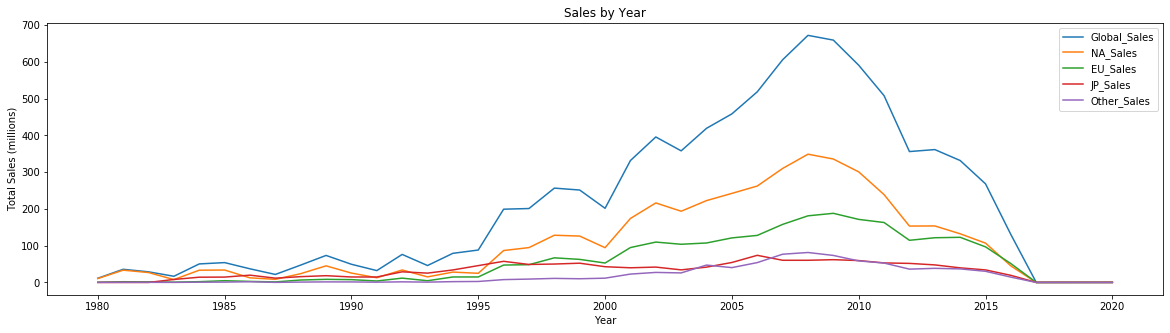

In [14]:
yearly_grouped = video_games.groupby(by="Year_of_Release")
all_sales_sum = (yearly_grouped[['Global_Sales','NA_Sales','EU_Sales','JP_Sales',
                                 'Other_Sales']]).sum()

all_sales_sum.plot(figsize=(20,5))
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.show()

###### Serie de tiempo de lanzamientos

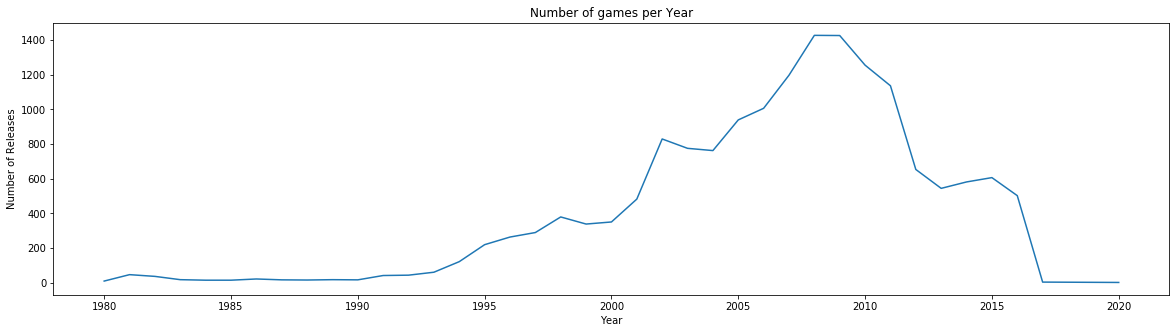

In [15]:
yearly_grouped = video_games.groupby(by="Year_of_Release")

games_x_year = yearly_grouped['Name'].count()

games_x_year.plot(figsize=(20,5))
plt.title('Number of games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

Vemos que los años donde hubo mayor venta de videojuegos fue después del año 2000 y previamente al 2015. Aunque esto se debe a los datos que tenemos, donde a partir de 2016, la base ya no contempla nuevos lanzamientos.

Cuando el año específico o el volumen de venta respecto al tiempo sea relevante, se considerarán los datos unicamente hasta 2016.

### Ventas por género del videojuego

Text(0, 0.5, 'Global Sales')

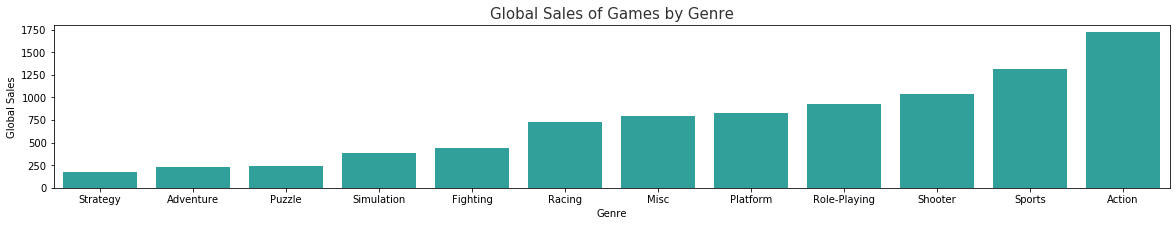

In [16]:
global_sales_by_genre = video_games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize = (20,3))
ax = sns.barplot(x = global_sales_by_genre.index, y = global_sales_by_genre.Global_Sales, color = 'lightseagreen')
ax.set_title('Global Sales of Games by Genre', size=15, alpha=0.8)
ax.set_xlabel('Genre', size = 10)
ax.set_ylabel('Global Sales', size=10)

### Ventas por plataforma

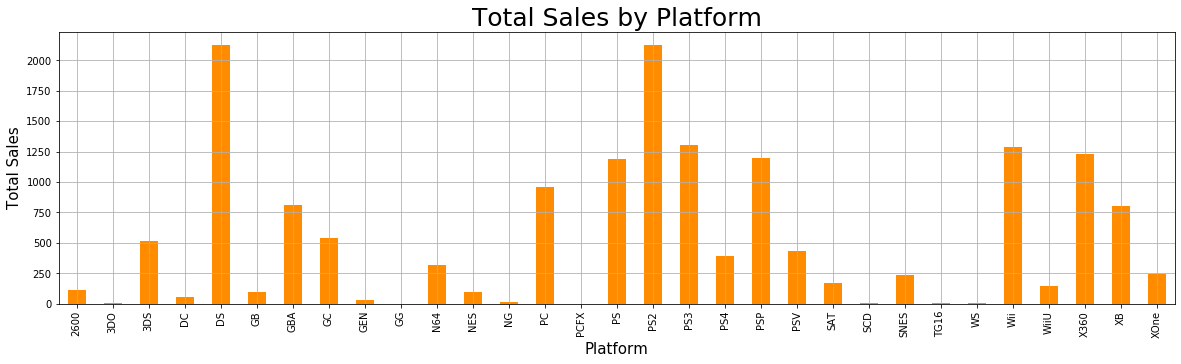

In [17]:
Platform_grouped = video_games.groupby(by = 'Platform')
total_sales = (Platform_grouped['Genre']).count().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkorange')
plt.title('Total Sales by Platform', size = 25)
plt.xlabel('Platform', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Se puede notar que las plataformas que más han vendido son PS2 y DS, seguidas por el PS3, Wii, X360 y PSP. Esto se debe a que estas son las consolas más populares en el periodo que se tienen más datos (2001 a 2015).

### Ventas por Publisher

Se utiliza la variable 'Publisher' a favor de 'Developer' ya que la primera está más agregada, es decir, un 'Publisher' está conformado de uno o más Developers. Para fines de este análisis, la información que nos provee 'Publisher' es suficiente.

Text(0, 0.5, 'Sales')

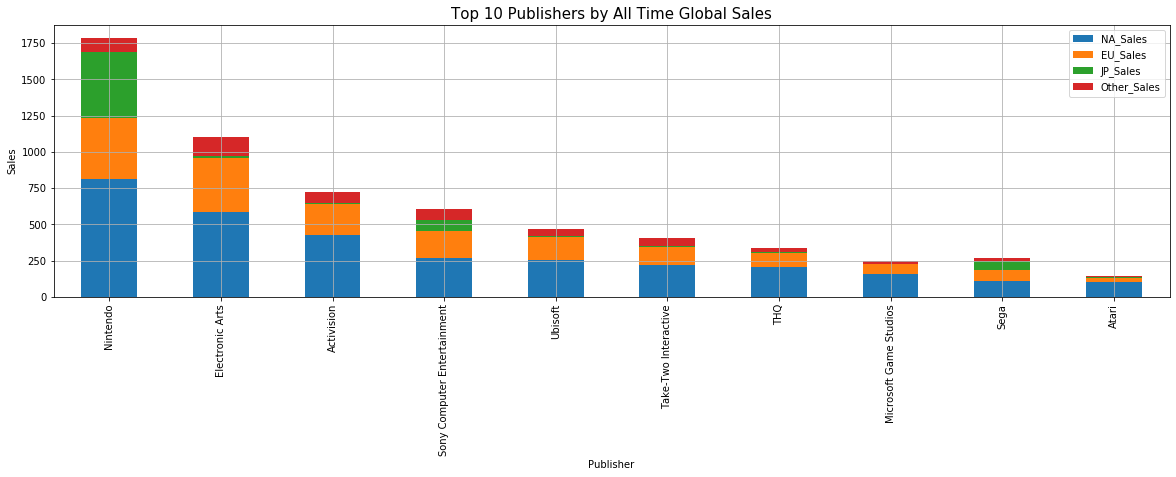

In [18]:
sales_publisher = video_games.pivot_table(index=['Publisher'], 
                                          values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                                          aggfunc=np.sum).sort_values(['NA_Sales'], ascending=False)
sales_publisher = sales_publisher[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ax = sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True,figsize=(20,5))
ax.set_title('Top 10 Publishers by All Time Global Sales', size=15)
ax.set_xlabel('Publisher', size=10, color='black')
ax.set_ylabel('Sales', size=10, color='Black')

La gráfica anterior muestra el top 10 de empresas desarrolladoras segun sus ventas acumuladas a lo largo del tiempo. Se observa que en Japón existe una prevalencia de marcas nacionales, es decir, Sony, Sega y Nintendo.

### Ventas por fabricante de cada plataforma

Se relizará una agrupación de algunas plataformas, por las compañías que las fabrican.

In [19]:
platforms = {"Playstation": ["PS", "PS2", "PS3", "PS4"],
             "Xbox": ["XB", "X360", "XOne"],
             "PC": ["PC"],
             "Nintendo": ["SNES", "N64","NES", "GC","Wii", "WiiU"],
             "Portatil_Nin": ["GB", "GBA",  "DS", "3DS"],
             "Portatil_PS" : ["PSP", "PSV"],
             "Sega": ["DC", "GEN", "SAT", "SCD"]}

video_games["Grouped_Platform"] = video_games["Platform"].apply(lambda x: label(x, groups=platforms))
video_games["Grouped_Platform"].unique()

array(['Nintendo', 'Portatil_Nin', 'Xbox', 'Playstation', 'PC',
       'Other_label', 'Portatil_PS', 'Sega'], dtype=object)

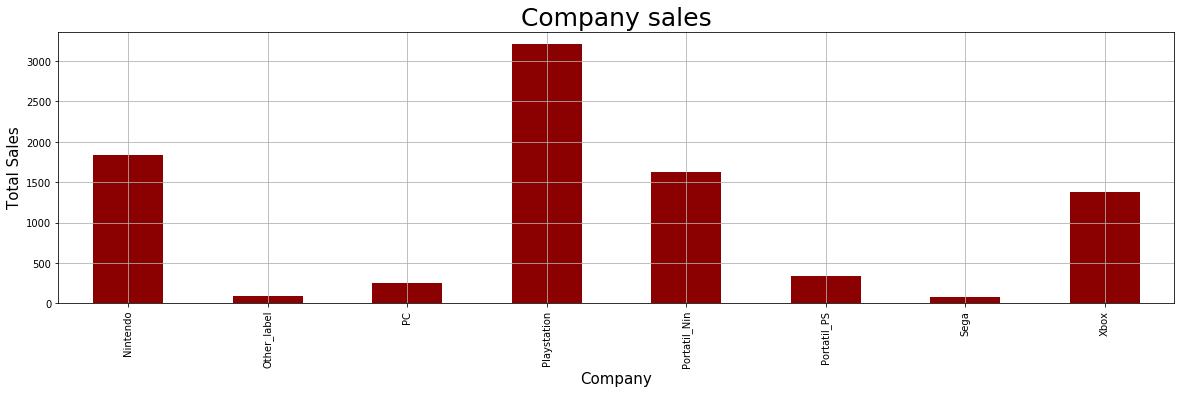

In [20]:
Platform_grouped = video_games[video_games['Year_of_Release'] < 2017].groupby(by = 'Grouped_Platform')
total_sales = (Platform_grouped['Global_Sales']).sum().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkred')
plt.title('Company sales', size = 25)
plt.xlabel('Company', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

### Ventas por fabricante a lo largo del tiempo

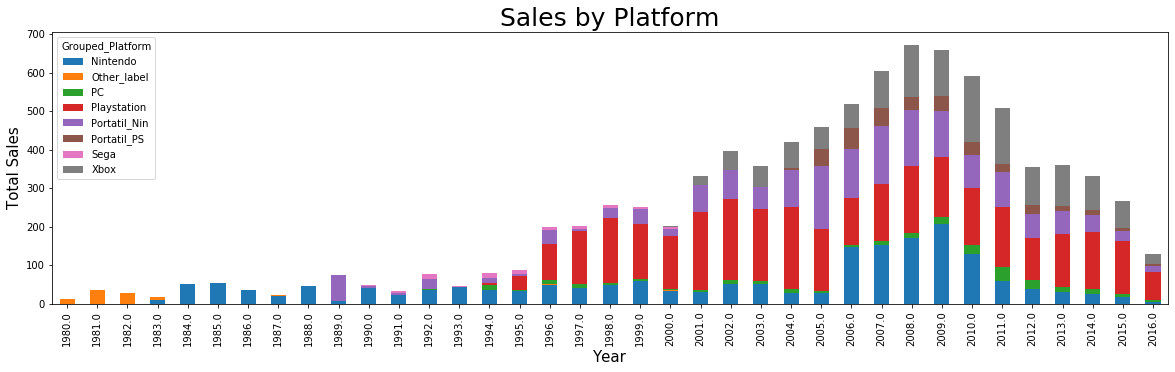

In [21]:

Platform_grouped = video_games[video_games['Year_of_Release'] < 2017].groupby(['Grouped_Platform','Year_of_Release'])
total_sales = (Platform_grouped['Global_Sales']).sum()

total_sales.unstack(level = -2).plot( kind = 'bar', stacked = True, grid=False, figsize=(20,5))
plt.title('Sales by Platform', size = 25)
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Se pueden observar varios puntos interesantes:
- Playstation dominó las ventas poco después de su lanzamiento en 1994.
- La industria de los videojuegos empezó a crecer rápidamente a partir de 2001, que coincide con la salida de XBox al mercado.
- Nintendo es el fabricante más viejo que aún tiene relevancia hoy en día.
- Es importante notar que se separó Nintendo (Consola) de Nintento portátil (Gameboy y similares), y ambas tienen una fuerte participación en el mercado a lo largo del tiempo.

### Share de mercado a lo largo del tiempo

La sección anterior es muy útil para tener una perspectiva clara del comportamiento de la venta de videojuegos por consola a lo largo del tiempo. Sin embargo, también nos es útil ver la composición del mercado relativa, es decir, independientemente del nivel de ventas de ese año, qué porcentaje de los videojuegos vendidos pertenece a cada plataforma.

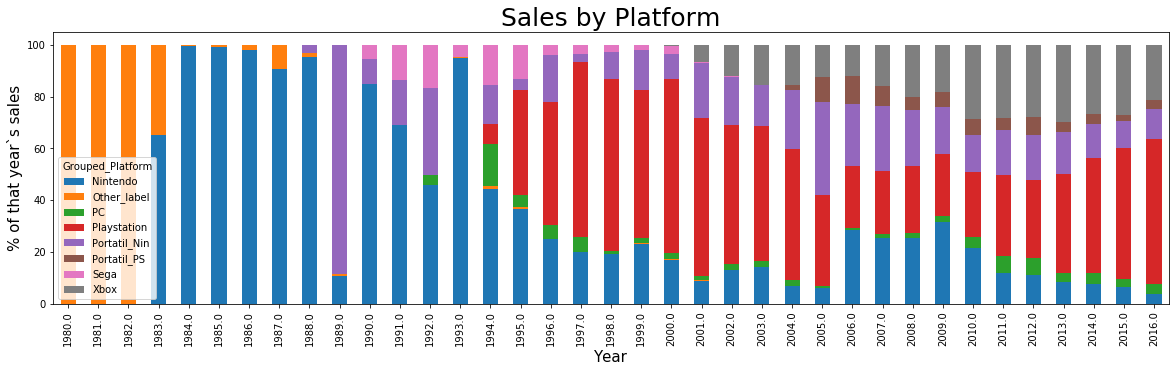

In [22]:
filled_data = total_sales.unstack(level = -2).fillna(0).apply(lambda x: x*100/sum(x), axis=1)

filled_data.plot( kind = 'bar', stacked = True, grid=False, figsize=(20,5))
plt.title('Sales by Platform', size = 25)
plt.xlabel('Year', size = 15)
plt.ylabel('% of that year`s sales',size = 15)
plt.show()

Algunos puntos relevantes:

- Nintendo dominó el mercado desde la salida del NES (Nintendo Entertainment System) en 1983, teniendo prácticamente un monopolio de los juegos publicados durante 3 años completos.
- El dominio de Nintendo sólo aumentó con la salida del GameBoy en 1989, es claro que en ese año todos los juegos vendidos eran de Gameboy o NES
- Sega hizo una lucha considerable, especialmente en el mercado japonés, con consolas como el Master System, Genesis y GameGear.
- Sega tuvo una participación de mercado decente durante algunos años, hasta que el nuevo milenio llegó y perdieron presencia completamente
- 1994 fue un año de transición y fuerte competencia, con una fuerte presencia de juegos de PC, y la salida del PlayStation de Sony. A partir de este año, comenzaría una dominio importante por parte de dicha consola, que terminaría con el dominio por parte de Nintendo
- 2001 puede considerarse el inicio de la "Era Moderna" de los videojuegos, donde el mercado se ve muy similar a como lo conocemos en años recientes, con Sony(PlayStation), Microsoft (XBox) y Nintendo (Consola y Portátil) se debaten año con año participación en el mercado.

Es importante tener en mente que los datos que se analizan son de los videojuegos para cada consola, y no la consola en sí, sin embargo, resulta un buen proxy para tener una buena idea de las ventas de las consolas en sí, pues a fin de cuentas, la decisión de comprar una consola se basa, predominantemente, en los títulos exclusivos que es posible jugar.

### Videojuegos según rating

A continuación observaremos los ratings y los scores

In [23]:
video_games[['Name']].groupby(video_games['Rating']).count()

,Name
Rating,
AO,1
E,3922
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2905


In [24]:
video_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
rating_group = video_games[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Other_Sales']].groupby(video_games['Rating']).sum()
rating_group

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
Rating,,,,,
AO,1.26,0.61,0.00,1.95,0.09
E,1274.51,703.87,197.96,2408.96,231.56
E10+,345.50,183.35,40.20,641.20,71.93
EC,1.53,0.11,0.00,1.78,0.11
K-A,2.56,0.27,1.46,4.33,0.03
M,742.89,480.00,63.58,1462.60,176.06
RP,0.00,0.03,0.00,0.03,0.01
T,747.60,421.79,150.70,1474.13,152.99


Text(0, 0.5, 'Total Global Sales')

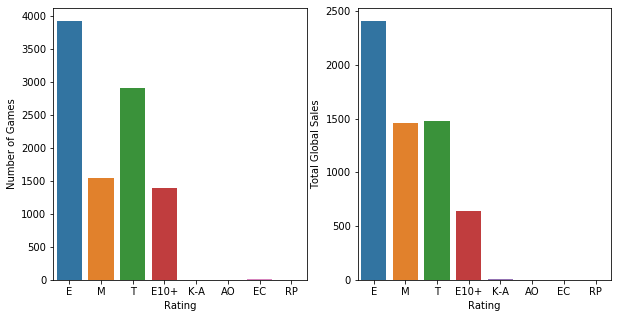

In [26]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="Rating", data=video_games, ax=ax1)
ax1.set_ylabel("Number of Games")
sns.barplot(x="Rating", y="Global_Sales",data=video_games, estimator=sum, ax=ax2, ci=None)
ax2.set_ylabel("Total Global Sales")

Practicamente todos los Ratings son una opción entre: E (Everyone), T (Teens), M (Mature), E10+ (Everyone older than 10)

### Ventas por Score

In [27]:
type(video_games['Critic_Score'])

pandas.core.series.Series

In [28]:
video_games.dropna(subset=["Name","Critic_Score"],inplace=True)
video_games['Critic_Score'].unique()
video_games.Critic_Score = video_games.Critic_Score.astype(np.int64)
type(video_games['Critic_Score'])

pandas.core.series.Series

In [29]:
type(video_games['User_Score'])

pandas.core.series.Series

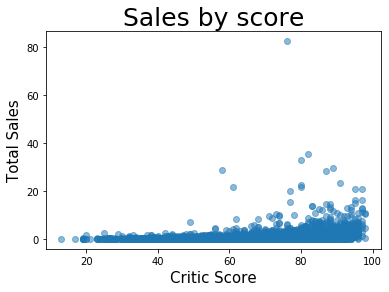

In [30]:
plt.scatter(video_games['Critic_Score'], video_games['Global_Sales'], alpha=0.5)
plt.title('Sales by score', size = 25)
plt.xlabel('Critic Score', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

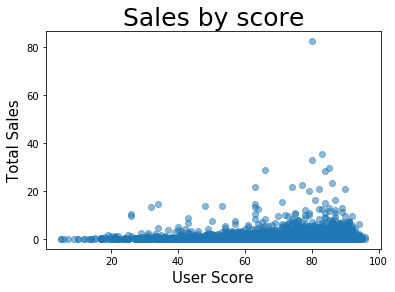

In [31]:
plt.scatter(video_games['User_Score'], video_games['Global_Sales'], alpha=0.5)
plt.title('Sales by score', size = 25)
plt.xlabel('User Score', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Veamos qué juego tiene ventas tan altas

In [32]:
video_games[video_games['Global_Sales']>80]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Grouped_Platform
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51.0,80.0,322.0,Nintendo,E,Nintendo


El mismísimo Wii Sports. Esto explica cómo sobrevivió Nintendo el periodo entre el lanzamiento de Wii y de Nintendo Switch

Realicemos una agrupación de las ventas para tener una mejor claridad de la relación entre Sales, Critic Score y User Score

In [33]:
video_games['Sale_Size'] = video_games['Global_Sales'].apply(lambda x: 'Huge' if x >= 20 else
                                                                       'Big' if x >= 10 else
                                                             'Medium' if x >= 5 else
                                                             'Small' if x >= 1 else
                                                             'XSmall' if x >= 0.5 else 'XXSmall')
video_games = video_games[video_games['Global_Sales']< 80]
video_games = video_games[video_games['Year_of_Release']< 2017]

Text(0.5, 0, '')

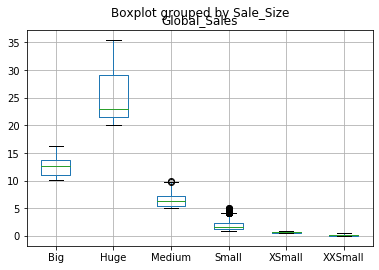

In [34]:
video_games.boxplot(column = ['Global_Sales'], by = 'Sale_Size')
plt.xlabel("")

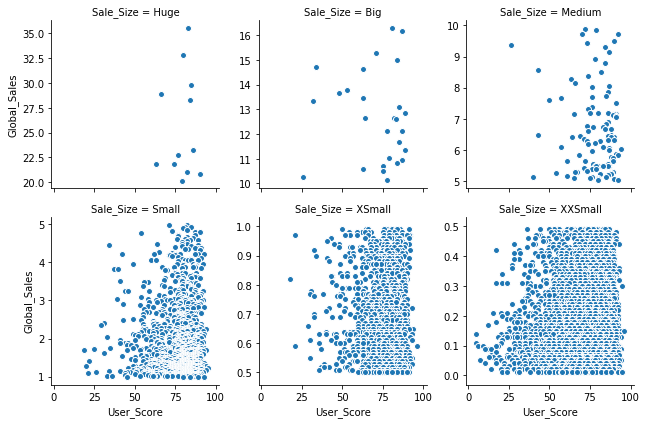

In [35]:
g = sns.FacetGrid(video_games, col="Sale_Size", col_wrap = 3, sharey = False)
g = g.map(plt.scatter, 'User_Score', 'Global_Sales', edgecolor="w")

Hay demasiados puntos como para buscar un patrón, por lo que resumiremos las ventas a nivel 'Publisher', usando el promedio y un subconjunto de años.

### Paquetes utilizados

En esta sección, además de Pandas y Matplotlib, que se explicó anteriormente, se utilizó el paquete [Seaborn](https://seaborn.pydata.org/). En este caso, fue la facilidad con la cual nos permite hacer "facets" en las gráficas, es decir, hacer un gráfico conformado de varios "subgráficos" que nos llevó a utilizarlo.

En general, Seaborn es una librería de visualización estadística que contiene funciones muy útiles para crear gráficas elaboradas, con un nivel alto de estética. La principal ventaja es que esta basado en Matplotlib, lo cual provee compatibilidad entre estos dos paquetes.

## Modelación

Basado en resultados anteriores, observamos que el número de juegos totales empieza a decrecer agresivamente después de 2015, lo que sugiere que los datos pueden no estar completos después de este año. Tomaremos entonces, 2015 como el límite superior para el año de estreno.

En cuanto al limite inferior, 2001 será tomado ya que es el año en el que comienza a aparecer la consola "XBox" de Microsoft, una de las consolas más importantes de la actualidad. Antes de esto, el mercado de videojuegos se veía muy distinto, con marcas como Sega teniendo una gran importancia que ahora han desaparecido.

Así pues, teniendo estos parámetros establecidos, se procede a buscar si existe una relación entre el Score, tanto de críticos como de usuarios y las ventas globales.

Como se observó anteriormente, tomar los datos desagregados no parece muy prometedor, por lo que se tomará un promedio tanto de ventas globales como de Scores de críticos y usuarios a nivel 'Publisher', esto creará una reducción en el número de datos, mientras que se captura y condensa el comportamiento que vamos a analizar.

In [36]:
scores_data = video_games[video_games['Year_of_Release'].between(2001,2015)]
scores_data = scores_data[['Global_Sales', 'Publisher', 'User_Score', 'Critic_Score']].dropna()
scores_by_publisher = scores_data.groupby(['Publisher']).mean()

In [37]:
scores_by_publisher

,Global_Sales,User_Score,Critic_Score
Publisher,,,
10TACLE Studios,0.020000,70.000000,42.000000
1C Company,0.033333,77.333333,73.000000
2D Boy,0.040000,85.000000,90.000000
3DO,0.145455,60.636364,55.272727
505 Games,0.417162,64.351351,62.175676
...,...,...,...
Zoo Digital Publishing,0.194167,64.875000,52.916667
Zoo Games,0.446667,72.666667,60.333333
Zushi Games,0.210000,86.000000,68.000000


Obsérvese que se toman únicamente los casos completos, es decir, casos que no tienen datos faltantes en ninguna de las variables de interés.

In [38]:
scores_by_publisher.corr()

,Global_Sales,User_Score,Critic_Score
Global_Sales,1.000000,0.090667,0.230041
User_Score,0.090667,1.000000,0.689923
Critic_Score,0.230041,0.689923,1.000000


La matriz de correlación sugiere que la relación entre 'User Score' y 'Global Sales' es débil, mientras que la relación entre 'Global Sales' y 'Critic Score' es un poco más fuerte.

Como es de esperarse, ambos 'Scores' están correlacionados, ya que, en general, las reseñas de los críticos suele coincidir con la percepción general del público, aunque, por supuesto, existen excepciones.

### Ajustar modelos

Para obtener información más clara sobre la relación entre estas variables, es conveniente ajustar un modelo de regresión lineal.

Se utilizará para este propósito, la función LinearRegression() del paquete scikit-learn, y matplotlib para visualizar los resultados.

In [39]:
u_sc = scores_by_publisher['User_Score'].values.reshape(-1, 1)  # convertir cada columna a un numpy array
c_sc = scores_by_publisher['Critic_Score'].values.reshape(-1, 1)
g_sl = scores_by_publisher['Global_Sales'].values.reshape(-1, 1)

lm_1 = LinearRegression()  # crear objetos de la clase "LinearRegression"
lm_2 = LinearRegression()  # un objeto por cada modelo que se quiere ajustar
lm_3 = LinearRegression()

lm_1.fit(u_sc, g_sl)  # Ajuste de los modelos por medio de regresión Lineal
lm_2.fit(c_sc, g_sl) 
lm_3.fit(c_sc,u_sc) 

g_sl_1_pred = lm_1.predict(u_sc)  # Predicciones para cada modelo
g_sl_2_pred = lm_2.predict(c_sc)
u_sc_pred = lm_3.predict(c_sc)

#### Ventas globales vs. Score de usuario

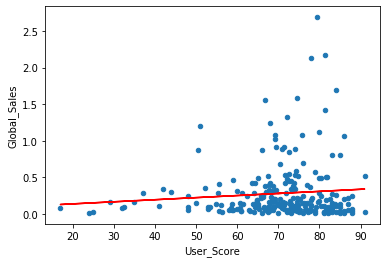

In [40]:
scores_by_publisher.plot.scatter('User_Score','Global_Sales')
plt.plot(u_sc, g_sl_1_pred, color = "red")

En primer lugar, visualizamos la relación entre ventas globales y score de usuario. Como observamos en la matriz de correlación anterior, la correlación entre estas dos variables no es muy fuerte. Esto se debe a que existen Publishers que suelen tener altos scores de usuario pero que no tienen un volumen de venta tan grande.

In [41]:
print('Beta_0:',lm_1.intercept_)
print('Beta_1:',lm_1.coef_)
print('R^2:',lm_1.score(u_sc, g_sl))

Beta_0: [0.08134856]
Beta_1: [[0.00284772]]
R^2: 0.008220542421938037


El coeficiente $R^2$ tan bajo nos indica que la variabilidad en las ventas no puede explicarse por medio del score de usuario.

#### Ventas globales vs. Score de críticos

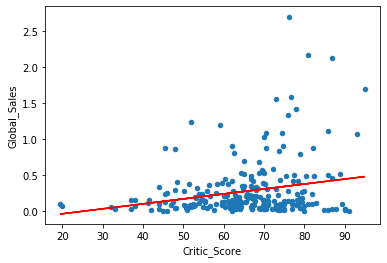

In [42]:
scores_by_publisher.plot.scatter('Critic_Score','Global_Sales')
plt.plot(c_sc, g_sl_2_pred, color = "red")

Se observa un caso similar al anterior, aunque parece haber una relación positiva fuerte, existen muchos 'Publishers' con muy buenos scores que no se traducen en niveles altos de venta.

In [43]:
print('Beta_0:',lm_2.intercept_)
print('Beta_1:',lm_2.coef_)
print('R^2:',lm_2.score(c_sc, g_sl))

Beta_0: [-0.16939005]
Beta_1: [[0.00686271]]
R^2: 0.05291874593426005


El coeficiente $R^2$ tan bajo, aunque un poco más alto que en el modelo de usuario, nos indica que la variabilidad en las ventas no puede explicarse por medio del score de críticos.

#### Score de críticos vs. Score de usuarios  

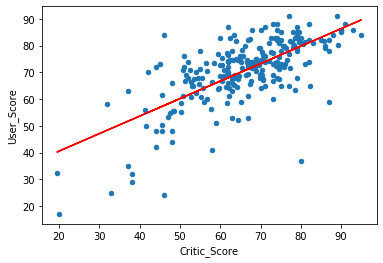

In [44]:
scores_by_publisher.plot.scatter('Critic_Score','User_Score')
plt.plot(c_sc, u_sc_pred, color = "red")

Ambos scores muestran una clara relación líneal positiva, mostrando que en general van de la mano 

In [45]:
print('Beta_0:',lm_3.intercept_)
print('Beta_1:',lm_3.coef_)
print('R^2:',lm_3.score(u_sc,c_sc))

Beta_0: [27.42407622]
Beta_1: [[0.65530714]]
R^2: 0.09966648823741053


Un coeficiente $R²$ $\approx.5$ sugiere que en general el score de crítico puede ser un buen predictor para el score de usuario, lo cual es importante ya que, en general, los scores de crítico son conocidos antes que los scores de usuario, y muchos usuarios pueden tomar la decisión de comprar o no un juego basado en las reseñas publicadas por los críticos.

Es importante notar que, aunque en general el ajuste es decente, existen muchos casos en los que el score de críticos es alto y el score de usuarios resultó ser bastante bajo.

#### Paquetes utilizados

Además de los paquetes mencionados anteriormente, en esta sección se utilizó [Scikit-learn](https://scikit-learn.org/stable/), un paquete que tiene funciones de Machine Learning con una sintaxis muy sencilla e intuitiva de usar. En este caso, lo utilizamos únicamente para ajustar los modelos de Regresión Líneal, con la intención de explorar una nueva manera para hacerlo, complementando lo que vimos en clase.

### Conclusión 

Tras analizar esta base de datos podemos concluir que el auge en la venta de videojuegos ocurre a partir del 2000, coincide con la salida al mercado de la consola Xbox en 2001. Hasta el 2016, la consola con más ventas es Nintendo DS y PS2. En general, las ventas de videojuegos para las consolas de Play Station lo han posicionado como la consola dominante. A pasar de esto, Nintendo continúa siendo un competidor importante, ya que ha tenido una participación alta en el mercado a lo largo de mucho tiempo. En cuanto a las carácteristicas de los videojuegos, se encontró que el género más popular es el de acción y que los videjuegos con mayores ventas son aquellos con rating "E", es decir para todo público. Además se encontró que existe una relación lineal en le que "Critics Score" explica "User Score" con un $R^{2}\approx.5$ por lo que "Critics Score" podría ser un buen predictor de "User Score".Esta información fue extraida con ayuda de los paquetes Pandas, Matploplib, Seaborn y Scikit-learn. 


